# 한민국 대통령 취임식 연설문을 활용한 텍스트마이닝



*  각 대통령의 연설문 특징 분석
* 가장 많이 언급된 단어는?
* 정치색(보수/진보) 성향이 담겨 있는가?
* 가장 중점을 두고 있는 분야나 대상을 찾을 수 있는가?



## 패키지 설치

In [16]:
! pip install konlpy
! pip install koreanize-matplotlib
! pip install wordcloud

## 라이브러리 임포트

In [17]:
import pandas as pd
import re

import konlpy
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

### 데이터 준비하기

In [18]:
moon = open('/content/문재인대통령_연설문.txt').read()
moon

# 하나의 데이터셋. 엄청 큰 문자열
# 파이썬 기본 함수

'존경하고 사랑하는 국민 여러분!\n감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다.\n\n저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한 번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어 갈청사진으로 가득 차 있습니다.\n\n우리가 만들어 가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리 선대들이 일관되게 추구했던 나라입니다. 또한 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기위해 저는 역사와 국민 앞에 두렵지만 겸허히 대한민국 제19대 대통령으로서 책임과 소명을 다할 것을 천명합니다.\n\n함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어 가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 미래로 전진해야 합니다.\n\n존경하는 국민 여러분!\n지난 몇 달간 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란했지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민께서 대한민국의 앞길을 열어 주셨습니다. 우리 국민은 좌절하지 않고 오히려 전화위복의 계기로 삼아 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민은 또 하나의 역사를 만들어 주셨습니다. 전국 각지에서 고른 지지로 새로운 대한민국을 선택해 주셨습니다. 오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 분도 진심으로 우리의 국민으로 섬기겠습니다. 저는 감히 약속드립니다. 2017년 5월 10일은 진정한 국민통합이 시작된 날로 역사에 기록될 것입니다.\n\n존경하고 사랑하는 국민 여러분

## 데이터 전처리

### 전처리-1) 특수기호 밎 html tag(줄바꿈\n), 숫자등을 삭제

In [19]:
# re는 패키지 sub은 함수() 안에는 정규식.

#moon = re.sub('[^가-힣]', ' ', moon)  # 한글 제외 모두 지움
moon

'존경하고 사랑하는 국민 여러분!\n감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다.\n\n저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한 번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어 갈청사진으로 가득 차 있습니다.\n\n우리가 만들어 가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리 선대들이 일관되게 추구했던 나라입니다. 또한 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기위해 저는 역사와 국민 앞에 두렵지만 겸허히 대한민국 제19대 대통령으로서 책임과 소명을 다할 것을 천명합니다.\n\n함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어 가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 미래로 전진해야 합니다.\n\n존경하는 국민 여러분!\n지난 몇 달간 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란했지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민께서 대한민국의 앞길을 열어 주셨습니다. 우리 국민은 좌절하지 않고 오히려 전화위복의 계기로 삼아 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민은 또 하나의 역사를 만들어 주셨습니다. 전국 각지에서 고른 지지로 새로운 대한민국을 선택해 주셨습니다. 오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 분도 진심으로 우리의 국민으로 섬기겠습니다. 저는 감히 약속드립니다. 2017년 5월 10일은 진정한 국민통합이 시작된 날로 역사에 기록될 것입니다.\n\n존경하고 사랑하는 국민 여러분

###  명서 단어 추출

In [ ]:
#komoran, Hannanum, KKma

hannanum = konlpy.tag.Hannanum()
h_moon_nn = hannanum.nouns(moon)
h_moon_nn

# 리스트 형태로 제공

In [ ]:
komoran = konlpy.tag.Komoran()
k_moon_nn = komoran.nouns(moon)
k_moon_nn


### 데이터 프레임으로 변환

In [26]:
 h_word_df = pd.DataFrame({'word': h_moon_nn})
 h_word_df

,word
0,존경
1,사랑
2,국민
3,여러분
4,감사
...,...
458,길
459,저
460,신명
461,일


In [27]:
k_word_df = pd.DataFrame({'word': k_moon_nn})
k_word_df

,word
0,존경
1,사랑
2,국민
3,여러분
4,감사
...,...
432,시작
433,길
434,신명
435,일


### 단어수 파생변수 *작성*

In [28]:
h_word_df['count'] = h_word_df['word'].str.len()
h_word_df

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2
...,...,...
458,길,1
459,저,1
460,신명,2
461,일,1


In [ ]:
k_word_df['count'] = k_word_df['word'].str.len()
k_word_df

### 두 글자 이상 단어만 남기고 삭제(한단어 삭제)

In [30]:
k_word_df = k_word_df.query('count >= 2')
k_word_df

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2
...,...,...
430,나라,2
431,역사,2
432,시작,2
434,신명,2


In [31]:
h_word_df = h_word_df.query('count >= 2')
h_word_df

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,감사,2
...,...,...
455,나라답,3
456,만드는역사,5
457,시작,2
460,신명,2


### 단어사용 빈도표 (사용 빈도가 많은순으로 정렬)

In [44]:
h_word_df = h_word_df.groupby('word', as_index=False).agg(n=('word','count')).sort_values('n',ascending  = False)
h_word_df

,word,n
0,10일,1
175,자랑,1
162,위대,1
163,위대한,1
164,위대함,1
...,...,...
90,문재인정부,1
91,문제,1
92,문화,1
93,미국,1


In [34]:
k_word_df = k_word_df.groupby('word', as_index=False).agg(n=('word','count')).sort_values('n',ascending  = False)
k_word_df

,word,n
48,대통령,31
30,국민,24
50,대한민국,11
40,나라,10
167,정치,6
...,...,...
109,솔선수범,1
110,순간,1
111,승자,1
1,가슴,1


### 단어빈도 상위 20개만 추출

In [36]:
h_top20 = h_word_df.head(20)
k_top20 = k_word_df.head(20)

### 단어 빈도 시각화

In [ ]:
# 2개 그래프 한번에 표현하기

fig, axes = plt.subplots (1,2,figsize = (15,5)) #1=row 2=coloum /사이즈는 가로 15, 세로 5 /fig 는 스케치북,axes = 축
plt.suptitle('한국어 자연어 처리기 Hannanum, Komoran 명사 비교 분석')

sns.barplot(data=h_top20, x= 'n', y = 'word', ax=axes[0])
axes[0].set_title('Hannanum')

sns.barplot(data=k_top20, x= 'n', y = 'word', ax=axes[1])
axes[1].set_title('Komoran')

plt.show()

###wordcloud 시각화하기시러잉 ㅠ 졸려ㅠ

### 한글 폰트 설정

In [83]:
font_path = '/content/BMDOHYEON_ttf.ttf'

### 단어와 빈도를 담은 딕셔너리 만들기

In [84]:
k_word_dic = k_word_df.set_index('word').to_dict()['n']
k_word_dic

{'대통령': 31,
 '국민': 24,
 '대한민국': 11,
 '나라': 10,
 '정치': 6,
 '여러분': 6,
 '오늘': 5,
 '세상': 5,
 '시작': 5,
 '존경': 5,
 '역사': 5,
 '대화': 4,
 '문재인': 4,
 '선거': 4,
 '권력': 4,
 '약속': 4,
 '시대': 4,
 '감사': 4,
 '잘못': 3,
 '지지': 3,
 '해결': 3,
 '말씀': 3,
 '머리': 3,
 '갈등': 3,
 '평화': 3,
 '사랑': 3,
 '소통': 3,
 '과정': 3,
 '이번': 3,
 '정부': 3,
 '좌절': 2,
 '문제': 2,
 '이웃': 2,
 '한반도': 2,
 '동반자': 2,
 '마련': 2,
 '전국': 2,
 '정착': 2,
 '불행': 2,
 '시민': 2,
 '빈손': 2,
 '대통령 선거': 2,
 '어깨': 2,
 '통합': 2,
 '인재': 2,
 '탄핵': 2,
 '제가': 2,
 '안보': 2,
 '선택': 2,
 '5월 10일': 2,
 '기관': 2,
 '공정': 2,
 '광화문': 2,
 '강화': 2,
 '대원칙': 1,
 '제왕': 1,
 '정경': 1,
 '정례': 1,
 '경쟁': 1,
 '정의': 1,
 '겸손': 1,
 '결별': 1,
 '결과': 1,
 '견제': 1,
 '조성': 1,
 '종식': 1,
 '격변기': 1,
 '준비': 1,
 '중국': 1,
 '지금': 1,
 '지역': 1,
 '거짓': 1,
 '젊은이들': 1,
 '전진': 1,
 '전화위복': 1,
 '자랑': 1,
 '유착': 1,
 '의역': 1,
 '이득': 1,
 '계층': 1,
 '계속': 1,
 '인사': 1,
 '계기': 1,
 '일자리': 1,
 '자세': 1,
 '진심': 1,
 '자주국방': 1,
 '경험': 1,
 '장치': 1,
 '재벌': 1,
 '적재적소': 1,
 '경제': 1,
 '전기': 1,
 '전임': 1,
 '진보': 1,
 '질문': 1,
 '위로': 1,

### 워드 클라우드 만들기

<function matplotlib.pyplot.show(close=None, block=None)>

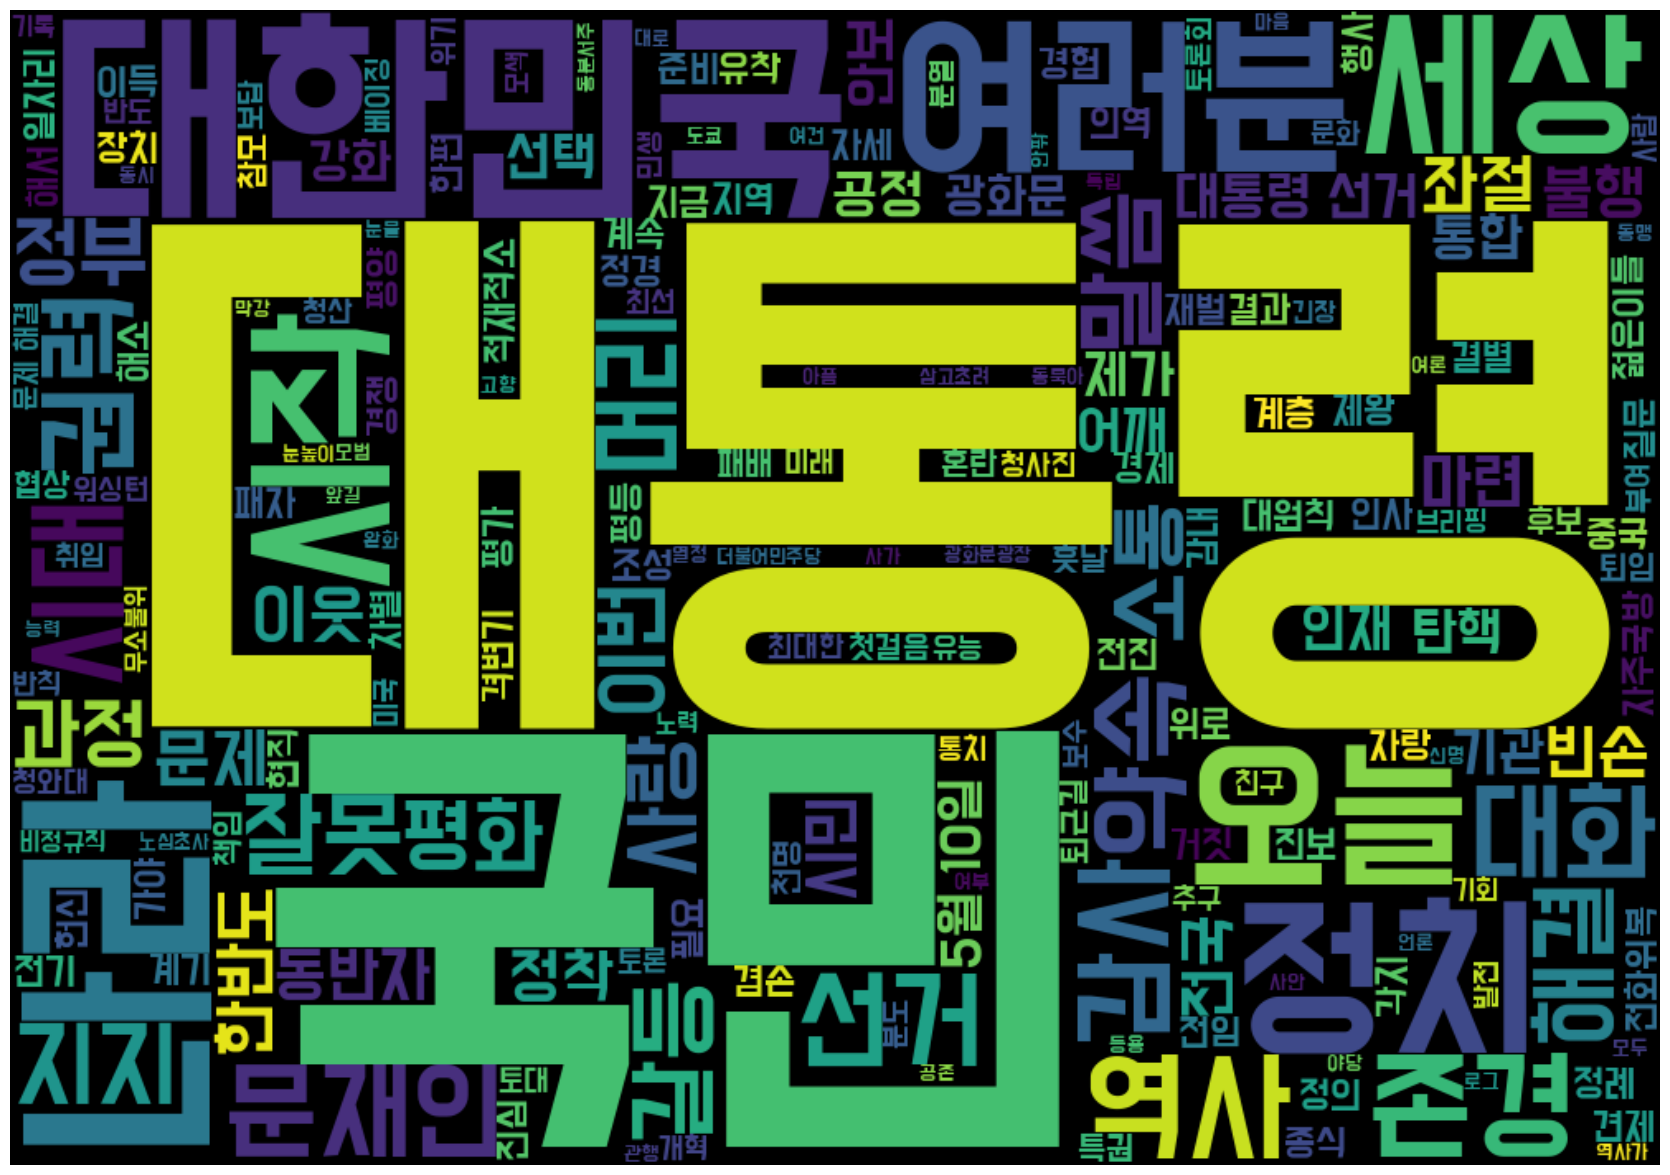

In [85]:
from wordcloud import WordCloud

wc = WordCloud(width = 1000, height = 700, font_path = font_path)
img_wordcloud = wc.generate_from_frequencies(k_word_dic)

plt.figure(figsize = (25,15))
plt.axis('off')
plt.imshow(img_wordcloud,interpolation = 'bilinear')
plt.show

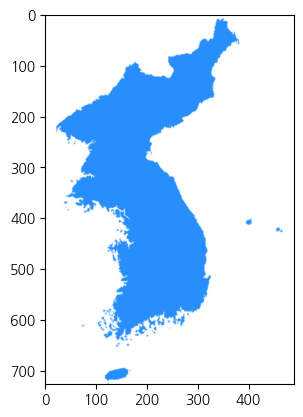

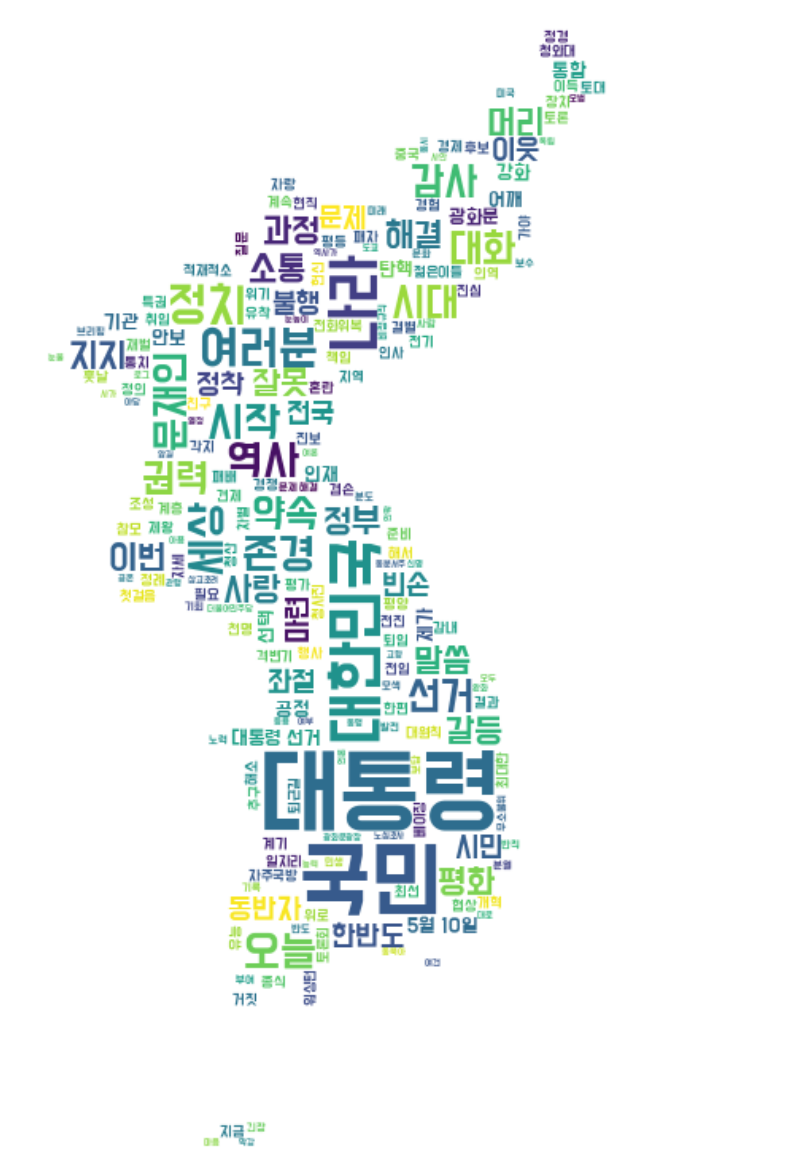

In [87]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

icon = Image.open('/content/korea_mask.jpg')
plt.imshow(icon)

korea_mask = np.array(icon)

wc = WordCloud(background_color = 'white', width=1000,height=700, font_path= font_path, mask=korea_mask)
img_wordcloud = wc.generate_from_frequencies(k_word_dic)

plt.figure(figsize=(25,15))
plt.axis('off')
plt.imshow(img_wordcloud,interpolation='bilinear')
plt.show()

### mask를 활용한 워드클라우드 시각화

### 워드클라우드 이미지 저

In [88]:
img_wordcloud.to_file(filename = 'moon_wordcloud.png')